<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/simulation/differentialequation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Differential Equations

## Little Theory

Do not hesitate to study [Wiki](https://en.wikipedia.org/wiki/Differential_equation).

You need to know about ODE, that we expect equations in standard form 

$\frac{dy}{dx}=f(x)$

or in short form

$y'=f(x)$

For solution of such equations we can use several methods such as [Runge-Kutta methods](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods).

Some software libraries have functions which have been designed for solution. In case of Python there is package [```scipy```](https://www.scipy.org/). There is namespace [```scipy.integrate```](https://docs.scipy.org/doc/scipy/reference/integrate.html) which contains functions ```RK45```, ```DOP853``` or others.

All those functions create solver which can be called repeatly. As a parameter the python function which is equivalent of $\frac{dy}{dt}=f(t,y)$ must be passed.

## Inevitable imports

In [0]:
import scipy.integrate as integrate # for numerical solution od differential equations
import matplotlib.pyplot as plt     # for plots
import pandas as pd                 # for tables
import numpy as np                  # for matrices

plt.rcParams["figure.figsize"] = (15,10)

## Displaying Data

,x,y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64


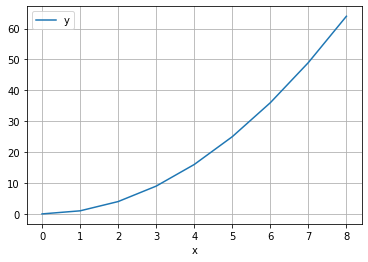

In [2]:
def displayData(data):
  display(pd.DataFrame(data))

def plotData(data, x = 0, y = 1, ax = None):
  df = pd.DataFrame(data)
  newax = None
  if ax is None:
    newax = df.plot.line(x = x, y = y)
  else:
    newax = df.plot.line(x = x, y = y, ax = ax)
  return newax

#=================#
# example of use  #
#=================#
#data = [(0, 0), (1, 1), (2, 4), (3, 9), (4, 16), (5, 25), (6, 36), (7, 49)]
data = [
  {'x': 0, 'y': 0}, {'x': 1, 'y': 1}, {'x': 2, 'y': 4},
  {'x': 3, 'y': 9}, {'x': 4, 'y': 16}, {'x': 5, 'y': 25},
  {'x': 6, 'y': 36}, {'x': 7, 'y': 49}, {'x': 8, 'y': 64},
]
plotData(data)
plt.grid(which='both')
displayData(data)

## Computation Method

Notice two lines bellow

```python
  #solver = integrate.RK45(fun = model, t0 = t0, y0 = state0, t_bound = t_bound, max_step = max_step)
  solver = integrate.DOP853(fun = model, t0 = t0, y0 = state0, t_bound = t_bound, max_step = max_step)
```

Feel free to (un)comment lines and change solver.

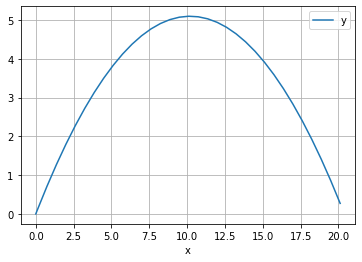

In [4]:
def compute(model, state0, t0 = 0.0, t_bound = 10, max_step = 0.0625):
  #solver = integrate.RK45(fun = model, t0 = t0, y0 = state0, t_bound = t_bound, max_step = max_step)
  solver = integrate.DOP853(fun = model, t0 = t0, y0 = state0, t_bound = t_bound, max_step = max_step)

  while True:
    message = solver.step()
    currentItem = {'time': solver.t, 'y': [*solver.y], 'yd': [*model(solver.t, solver.y)]}

    yield currentItem # send signal, inform about current result
    if (not(solver.status == 'running')):
        break
  return

#=================#
# example of use  #
#=================#
def model2D(time, state):
  velocity = state[:2]
  position = state[2:]
  acceleration = [0, -9.81]
  return [*acceleration, *velocity]

sim = compute(model2D, [10, 10, 0, 0])
result = []
for index, state in enumerate(sim):
  result.append(state)
  if index == 34: #magic number
    break

xy = list(map(lambda item: {'x': item['y'][2], 'y': item['y'][3]}, result))
plotData(xy)
plt.grid(which='both')